# Gaussian Bayes classifier

In [1]:
%matplotlib inline

from sklearn.datasets import make_blobs, make_moons, make_regression, load_iris
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np

(150L, 2L)
(150L,)


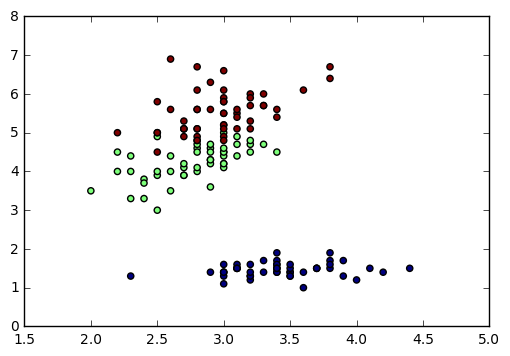

In [2]:
# For the moment we only take a couple of features from the IRIS dataset, for convenience of visualization 

iris = load_iris()
X = iris.data[:, 1:3]  
Y = iris.target

print X.shape
print Y.shape
plt.scatter(X[:,0],X[:,1], c=Y)

The probability that the unclassified sample x_new belongs to class c will be computed as follows:
<img src="https://github.com/lopeLH/Gaussian-Bayes-classifier/blob/master/probs.PNG?raw=true">

To keep things as simple as possible we use a uniform prior so:

$P(y_{new} = c \mid X,Y) = 1/C $

Finally, we use Gaussian class-conditional distributions (with no naive asumptions):

$P(x_{new} \mid y_{new} = c, X, Y) = \mathcal{N}(\mu_c,\sum_c)$

For a detailed description on how to calculate $\mu_c$ and $\sum_c$ please refer to Rogers et al. (2015)

Rogers, S., & Girolami, M. (2015). A first course in machine learning. CRC Press.

In [3]:
#Actual algorithm implementation.

class BayesClassifier:
    
    mu = None
    cov = None
    n_classes = None
    
    def __init__(self):
        a = None
    
    def pred(self,x):
        prob_vect = np.zeros(self.n_classes)
        
        for i in range(self.n_classes):
            
            
            mnormal = multivariate_normal(mean=bc.mu[i], cov=bc.cov[i])
            
            # We use uniform priors
            prior = 1./self.n_classes
            
            prob_vect[i] = prior*mnormal.pdf(x)
            sumatory = 0.
            for j in range(self.n_classes):
                mnormal = multivariate_normal(mean=bc.mu[j], cov=bc.cov[j])
                sumatory += prior*mnormal.pdf(x)
            prob_vect[i] = prob_vect[i]/sumatory
        return prob_vect
        
    def fit(self, X,y):
        self.mu = []
        self.cov = []
        
        self.n_classes = np.max(y)+1
        
        for i in range(self.n_classes):
            Xc = X[y==i]
            
            mu_c = np.mean(Xc, axis=0)
            self.mu.append(mu_c)
            
            cov_c = np.zeros((X.shape[1], X.shape[1]))
            for j in range( Xc.shape[0]):
                a = Xc[j].reshape((X.shape[1],1))
                b = Xc[j].reshape((1,X.shape[1]))
                cov_ci = np.multiply(a, b)
                cov_c = cov_c+cov_ci
            cov_c = cov_c/float(X.shape[0])
            self.cov.append(cov_c)
        self.mu = np.asarray(self.mu)
        self.cov = np.asarray(self.cov)

In [4]:
# Fit the classifier on the two-feature dataset

bc = BayesClassifier()

bc.fit(X,Y)

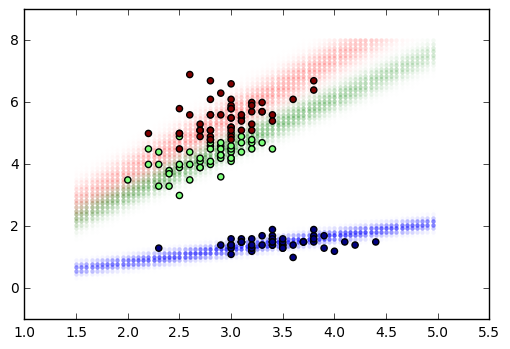

In [6]:
#Some spaghetti code to visualize the class-conditional distributions, only works with n_classes = 3!


cols = ["blue", "green", "red"]

for c in range(bc.n_classes):
    var = multivariate_normal(mean=bc.mu[c], cov=bc.cov[c])

    x = np.arange(1.5,5,(5-1.5)/70)
    y = -1*np.arange(-8,0,8./70)
    Xm,Ym = np.meshgrid(x, y)
    Z = Xm

    for i in range(y.shape[0]) :
        for j in range(x.shape[0]):
            plt.scatter([Xm[i][j]],[Ym[i][j]], alpha=1.1*var.pdf([Xm[i][j],Ym[i][j]]),
                        c=cols[c], linewidths=0, s=10, marker="o")
            
    
plt.scatter(X[:,0],X[:,1], c=Y)       
plt.show()

In [67]:
#Compare our implementation to the Gaussian NB classifier in sklearn (I win, yeah!)

from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split

iris = load_iris()
X = iris.data
Y = iris.target
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

bc = BayesClassifier()
bc.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

hit = 0.

for i in range(X_test.shape[0]):
    ypred = bc.pred(X_test[i])
    if np.argmax(ypred) == y_test[i]:
        hit += 1

print "Not so naive Gaussian bayes score: "+str(hit/X_test.shape[0])
print "Naive Gausian bayes score (sklearn): " +str(nb.score(X_test, y_test))



c:\users\amonimo\anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Not so naive Gaussian bayes score: 0.966666666667
Naive Gausian bayes score (sklearn): 0.9333333333333333
